# **Handling Categorical Data**

### **Import Libraries**

In [120]:
from seaborn import get_dataset_names
from seaborn import load_dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

### **Datasets Available in seaborn**

In [ ]:
print("Seaborn Datasets:\n")
count=0
for dataset_name in get_dataset_names():
  count+=1
  print(count,".",dataset_name)

Seaborn Datasets:

1 . anagrams
2 . anscombe
3 . attention
4 . brain_networks
5 . car_crashes
6 . diamonds
7 . dots
8 . exercise
9 . flights
10 . fmri
11 . gammas
12 . geyser
13 . iris
14 . mpg
15 . penguins
16 . planets
17 . tips
18 . titanic


### **Load Dataset "Diamonds"**

In [137]:
data=load_dataset('diamonds')
data.head(3) 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


### **Dataset Overview**

In [ ]:
data.sample(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
18417,1.24,Premium,D,SI1,62.4,59.0,7486,6.86,6.82,4.27
20919,1.23,Ideal,G,VS1,61.4,56.0,9133,6.96,6.91,4.26
51912,0.71,Good,D,SI2,63.3,55.0,2436,5.65,5.72,3.60


In [ ]:
data.tail(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
rows,cols=data.shape
print("Shape of the dataframe:",data.shape)
print("% Missing Values:",round(data.isnull().sum().sum()/rows,2))

Shape of the dataframe: (53940, 10)
% Missing Values: 0.0


In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


### **Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


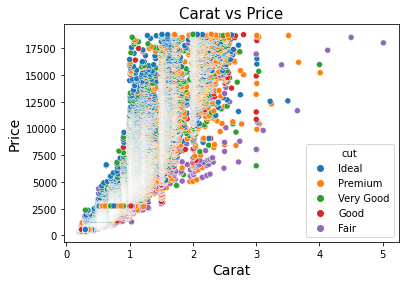

In [138]:
sns.scatterplot(data.carat,data.price,hue=data.cut,cmap='Set1')
plt.title('Carat vs Price',fontsize=15)
plt.xlabel('Carat',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()
#Many such graphs can be drawn based on the purpose

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


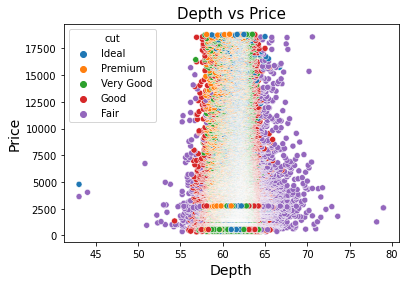

In [139]:
sns.scatterplot(data.depth,data.price,hue=data.cut,cmap='Set1')
plt.title('Depth vs Price',fontsize=15)
plt.xlabel('Depth',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()
#Many such graphs can be drawn based on the purpose

### **Categorical Features**

*The categorical features are Cut, Color and Clarity. These three features needs to be encoded before further processing is done.*

In [ ]:
cut=data.cut.unique()
print("Different Classes in Cut feature:",*cut)

color=data.color.unique()
print("Different Classes in Color feature:",*color)

clarity=data.clarity.unique()
print("Different Classes in Clarity feature:",*clarity)

Different Classes in Cut feature: Ideal Premium Good Very Good Fair
Different Classes in Color feature: E I J H F G D
Different Classes in Clarity feature: SI2 SI1 VS1 VS2 VVS2 VVS1 I1 IF


### **Encoding Categorical Features**

##### **Method 1: Using apply() for Cut feature**

In [140]:
def CutEncoding(cut):
  value=-1
  if(cut=="Ideal"):
    value=4
  elif(cut=="Premium"):
    value=3
  elif(cut=="Good"):
    value=2
  elif(cut=="Very Good"):
    value=1
  elif(cut=="Fair"):
    value=0
  return value

print("Cut Feature Before Encoding:",*data['cut'].unique())
data['cut']=data['cut'].apply(lambda x:CutEncoding(x))
print("Cut Feature After Encoding:",*data['cut'].unique())

Cut Feature Before Encoding: Ideal Premium Good Very Good Fair
Cut Feature After Encoding: 4 3 2 1 0


##### **Method 2: Using Label Encoder from sklearn.preprocessing for Color feature**

In [141]:
ColorEncoder=LabelEncoder()
print("Color Feature Before Encoding:",*data['color'].unique())
data.color=ColorEncoder.fit_transform(data.color)
print("Color Feature After Encoding:",*data['color'].unique())

Color Feature Before Encoding: E I J H F G D
Color Feature After Encoding: 1 5 6 4 2 3 0


##### **Method 3: Using DummyEncoding for Clarity Feature**

> Indented block



In [142]:
data.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,1,VS1,56.9,65.0,327,4.05,4.07,2.31


In [143]:
data=pd.get_dummies(data=data,columns=['clarity'])
data.head(3)

,carat,cut,color,depth,table,price,x,y,z,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,4,1,61.5,55.0,326,3.95,3.98,2.43,0,0,0,0,0,0,1,0
1,0.21,3,1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,0,0,1,0,0
2,0.23,2,1,56.9,65.0,327,4.05,4.07,2.31,0,0,0,1,0,0,0,0


### **Another Quick Example: Iris Dataset**

In [115]:
#Read Dataset
df=load_dataset('iris')
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
36,5.5,3.5,1.3,0.2,setosa
7,5.0,3.4,1.5,0.2,setosa
67,5.8,2.7,4.1,1.0,versicolor


In [116]:
#Species Feature needs to be Encoded
#Encoding using LabelEncoder
encoder=LabelEncoder()
print("Classes before encoding:",df.species.unique())
df['species']=encoder.fit_transform(df['species'])
print("Classes after encoding:",df.species.unique())

Classes before encoding: ['setosa' 'versicolor' 'virginica']
Classes after encoding: [0 1 2]


In [119]:
#Final Result
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
62,6.0,2.2,4.0,1.0,1
111,6.4,2.7,5.3,1.9,2
25,5.0,3.0,1.6,0.2,0
